In [3]:
# Please see readme file for insights from dataset

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(study_results,mouse_metadata,on='Mouse ID')

# Display the data table for preview
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [15]:
# Checking the number of mice.
combined['Mouse ID'].nunique()

249

In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_combined = combined.groupby(['Mouse ID','Timepoint']).count()['Tumor Volume (mm3)']
duplicate = grouped_combined.loc[grouped_combined > 1]
duplicate

Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: Tumor Volume (mm3), dtype: int64

In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = combined.loc[combined['Mouse ID'] == 'g989']
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicate = combined.loc[combined['Mouse ID'] != 'g989']
no_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [18]:
# Checking the number of mice in the clean DataFrame.
no_duplicate['Mouse ID'].nunique()

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group = no_duplicate.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean = group.mean().rename('Mean Tumor Volume')
median = group.median().rename('Median Tumor Volume')
variance = group.var().rename('Tumor Volume Variance')
st_dev = group.std().rename('Tumor Volume Std. Dev.')
st_err = group.sem().rename('Tumor Volume Std. Err.')

In [21]:
df = pd.concat([mean,median,variance,st_dev,st_err],axis=1)
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
group.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Measurements'>

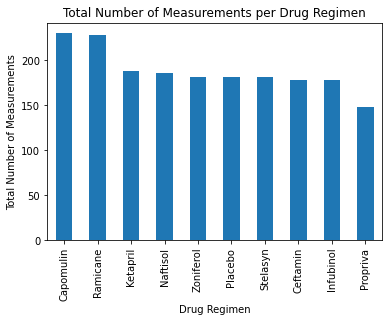

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

group_bar = no_duplicate.groupby('Drug Regimen').count().sort_values('Mouse ID',ascending=False)['Mouse ID']
group_bar.plot(kind='bar',xlabel = "Drug Regimen", ylabel = "Total Number of Measurements", title = "Total Number of Measurements per Drug Regimen")


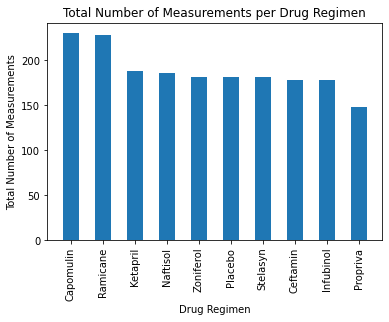

In [24]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

group_bar = no_duplicate.groupby('Drug Regimen').count().sort_values('Mouse ID',ascending=False)

x_axis = np.arange(len(group_bar))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, group_bar['Mouse ID'], align="center",width=0.5)
plt.xticks(tick_locations, group_bar.index, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.title("Total Number of Measurements per Drug Regimen")

plt.show()

<AxesSubplot:title={'center':'Gender Distribution of Mice'}, ylabel='Number of Mice'>

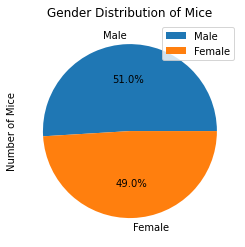

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

group_pie = no_duplicate.groupby('Sex').count().sort_values('Mouse ID', ascending = False)
group_pie.plot(kind='pie',y='Mouse ID',autopct='%1.1f%%',ylabel = 'Number of Mice',title = 'Gender Distribution of Mice')

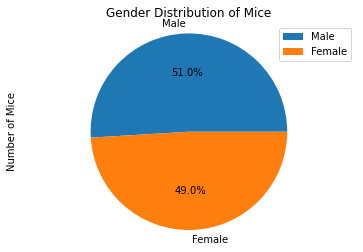

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

group_pie = no_duplicate.groupby('Sex').count().sort_values('Mouse ID', ascending=False)

plt.pie(group_pie['Mouse ID'],labels = group_pie.index, autopct="%1.1f%%")
plt.legend()
plt.ylabel('Number of Mice')
plt.title('Gender Distribution of Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_tumor = no_duplicate.groupby('Mouse ID').max('Timepoint')['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_v2 = pd.merge(no_duplicate,group_tumor,on=['Mouse ID','Timepoint'])

drug_of_interest = combined_v2.loc[(combined_v2['Drug Regimen'] == 'Capomulin')|(combined_v2['Drug Regimen'] == 'Ramicane')|(combined_v2['Drug Regimen'] == 'Infubinol')|(combined_v2['Drug Regimen'] == 'Ceftamin')]
drug_of_interest.sort_values('Drug Regimen')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
225,r554,45,32.377357,3,Capomulin,Female,8,17
226,s185,45,23.343598,1,Capomulin,Female,3,17
227,b742,45,38.939633,0,Capomulin,Male,7,21
228,x401,45,28.484033,0,Capomulin,Female,16,15
...,...,...,...,...,...,...,...,...
67,c758,45,33.397653,1,Ramicane,Male,9,17
222,i334,45,36.374510,2,Ramicane,Female,8,20
69,r811,45,37.225650,1,Ramicane,Male,9,19
110,q597,45,45.220869,2,Ramicane,Male,20,25


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = drug_of_interest['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq+(1.5*iqr)

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
Values below 3.0739668737499812 could be outliers
Values above 94.04403868375002 could be outliers


In [29]:
# Locate the rows which contain mice on each drug and get the tumor volumes

for i,x in drug_of_interest.iterrows():
    
    for t in treatments:
    
        if x['Drug Regimen'] == t:
        
        # add subset 
            if t not in tumor_vol:
                tumor_vol[t] = []
            
            tumor_vol[t].append(x['Tumor Volume (mm3)'])

In [30]:
# Determine outliers using upper and lower bounds

tumor_vol_outlier = {}

for t in treatments:
    quartiles_c = pd.Series(tumor_vol[t]).quantile([.25,.5,.75])
    lowerq_c = quartiles_c[0.25]
    upperq_c = quartiles_c[0.75]
    iqr_c = upperq_c-lowerq_c

    lower_bound_c = lowerq_c-(1.5*iqr_c)
    upper_bound_c = upperq_c+(1.5*iqr_c)
    
    print(f"{t}'s lower quartile: {lowerq_c}, upper quartile: {upperq_c}, interquartile range: {iqr_c}. Tumor volumes below {lower_bound_c} and above {upper_bound_c} could be outliers. \n")
    
    tumor_vol_outlier[t] = []
    
    for val in tumor_vol[t]:
        if val < lower_bound_c or val > upper_bound_c:
            tumor_vol_outlier[t].append(val)

print("---------------------------------------"*3)
print(f'Here are the following treatments and their outliers: {tumor_vol_outlier}')

Capomulin's lower quartile: 32.37735684, upper quartile: 40.1592203, interquartile range: 7.781863460000004. Tumor volumes below 20.70456164999999 and above 51.83201549 could be outliers. 

Ramicane's lower quartile: 31.56046955, upper quartile: 40.65900627, interquartile range: 9.098536719999998. Tumor volumes below 17.912664470000003 and above 54.30681135 could be outliers. 

Infubinol's lower quartile: 54.04860769, upper quartile: 65.52574285, interquartile range: 11.477135160000003. Tumor volumes below 36.83290494999999 and above 82.74144559000001 could be outliers. 

Ceftamin's lower quartile: 48.72207785, upper quartile: 64.29983003, interquartile range: 15.577752179999997. Tumor volumes below 25.355449580000002 and above 87.66645829999999 could be outliers. 

---------------------------------------------------------------------------------------------------------------------
Here are the following treatments and their outliers: {'Capomulin': [], 'Ramicane': [], 'Infubinol': [36.

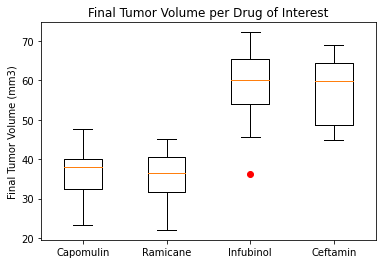

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Drug of Interest')
ax1.set_ylabel('Final Tumor Volume (mm3)')

prep_data = [] 
for t in treatments:
    prep_data.append(tumor_vol[t])

ax1.boxplot(prep_data, sym='r')
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

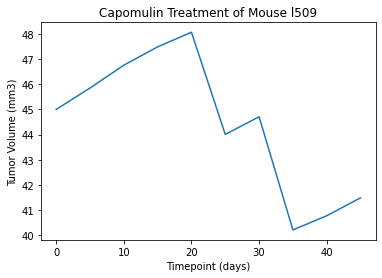

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug_capomulin = no_duplicate.loc[no_duplicate['Mouse ID'] == 'l509']
plt.plot(drug_capomulin['Timepoint'],drug_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

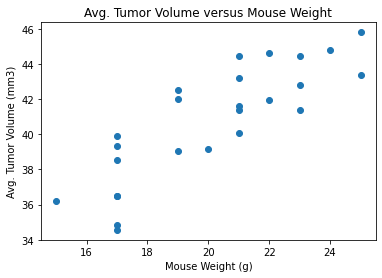

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drug_capomulin = no_duplicate.loc[no_duplicate['Drug Regimen'] == 'Capomulin']
drug_capomulin_group = drug_capomulin.groupby('Mouse ID').mean('Tumor Volume (mm3)')

plt.scatter(drug_capomulin_group['Weight (g)'],drug_capomulin_group['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.title('Avg. Tumor Volume versus Mouse Weight')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


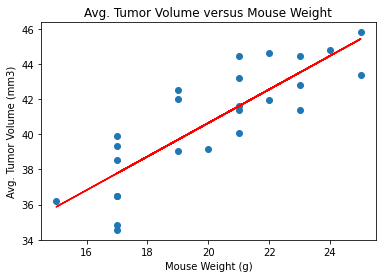

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = drug_capomulin_group['Weight (g)']
y_values = drug_capomulin_group['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(drug_capomulin_group['Weight (g)'],drug_capomulin_group['Tumor Volume (mm3)'])
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.title('Avg. Tumor Volume versus Mouse Weight')

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")

plt.show()